### Часть 1. Обработка табличных данных в Pandas. Подготовка данных.

## Задание 3 Для датасета California Housing:


- Разбейте датасет на тренировочную, валидационную и тестовую выборку
- Проведите преобразование категориального признака ocean_proximity через OneHot или Dummy-кодировку
- Замените признаки total_rooms и total_bedrooms на average_rooms и average_bedrooms (поделив на households).
- В признаке average_bedrooms (total_bedrooms) есть отсутствующие значения. Определите число экземпляров данных, для которых этот признак отсутствует. Придумайте и обоснуйте стратегию заполнения пропусков в этой задаче. Заполните пропуски.
- Нормализуйте признаки longitude и latitude (сделайте так, чтобы каждый признак имел среднее значение 0 и дисперсию 1 внутри обучающей выборки)

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [97]:
housing = pd.read_csv('housing.csv')
print(housing.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


##### Проведите преобразование категориального признака ocean_proximity через OneHot или Dummy-кодировку

In [98]:
housing_dummy = pd.get_dummies(housing, columns = ['ocean_proximity'], prefix_sep = '__')
housing_dummy

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity__<1H OCEAN,ocean_proximity__INLAND,ocean_proximity__ISLAND,ocean_proximity__NEAR BAY,ocean_proximity__NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


#####  Замените признаки total_rooms и total_bedrooms на average_rooms и average_bedrooms (поделив на households).

In [99]:
housing_dummy['average_rooms'] = housing_dummy['total_rooms']/housing_dummy['households']
housing_dummy['average_bedrooms'] = housing_dummy['total_bedrooms']/housing_dummy['households']
housing_dummy = housing_dummy.drop(['total_rooms','total_bedrooms'], axis=1)
housing_dummy

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity__<1H OCEAN,ocean_proximity__INLAND,ocean_proximity__ISLAND,ocean_proximity__NEAR BAY,ocean_proximity__NEAR OCEAN,average_rooms,average_bedrooms
0,-122.23,37.88,41.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,6.984127,1.023810
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,6.238137,0.971880
2,-122.24,37.85,52.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,8.288136,1.073446
3,-122.25,37.85,52.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,5.817352,1.073059
4,-122.25,37.85,52.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,6.281853,1.081081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0,5.045455,1.133333
20636,-121.21,39.49,18.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0,6.114035,1.315789
20637,-121.22,39.43,17.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0,5.205543,1.120092
20638,-121.32,39.43,18.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0,5.329513,1.171920


##### В признаке average_bedrooms (total_bedrooms) есть отсутствующие значения. Определите число экземпляров данных, для которых этот признак отсутствует. Придумайте и обоснуйте стратегию заполнения пропусков в этой задаче. Заполните пропуски.

In [100]:
print(housing_dummy.isna().sum())

longitude                        0
latitude                         0
housing_median_age               0
population                       0
households                       0
median_income                    0
median_house_value               0
ocean_proximity__<1H OCEAN       0
ocean_proximity__INLAND          0
ocean_proximity__ISLAND          0
ocean_proximity__NEAR BAY        0
ocean_proximity__NEAR OCEAN      0
average_rooms                    0
average_bedrooms               207
dtype: int64


Логичным кажется заполнить пустые ячейки средним значением по столбцу, но кое-кто шепнул, что желательно обучить что-нибудь, и заполнить пропуски предсказанными значениями...в принципе это более логично ***\\/(^w^)\\/***

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [102]:
housing_bedrooms_pred = housing_dummy.dropna(axis=0)
train, test = train_test_split(housing_bedrooms_pred, test_size = 0.1)
linReg = LinearRegression()
trainX = train.drop('average_bedrooms',axis=1)
trainY = train['average_bedrooms']
testX = test.drop('average_bedrooms',axis=1)
testY = test['average_bedrooms']
linReg.fit(trainX,trainY)
print('train score: ', linReg.score(trainX,trainY))
print('test score: ', linReg.score(testX,testY))

train score:  0.8656573866556463
test score:  0.8729747894641078


In [103]:
housing_predX = housing_dummy[housing_dummy['average_bedrooms'].isnull()].drop('average_bedrooms',axis=1)
housing_predY = linReg.predict(housing_predX)
housing_dummy.loc[housing_dummy['average_bedrooms'].isnull(), 'average_bedrooms'] = housing_predY

In [104]:
print(housing_dummy['average_bedrooms'].isna().sum())

0


##### Разбейте датасет на тренировочную, валидационную и тестовую выборку

In [105]:
housing_train_val, housing_test = train_test_split(housing_dummy, test_size = 0.1)
housing_train, housing_val = train_test_split(housing_train_val, test_size= 0.2)
print(housing_train.shape,housing_val.shape,housing_test.shape)

(14860, 14) (3716, 14) (2064, 14)


#####  Нормализуйте признаки longitude и latitude (сделайте так, чтобы каждый признак имел среднее значение 0 и дисперсию 1 внутри обучающей выборки)

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
longitude_scaler = StandardScaler().fit(housing_train[['longitude']])
latitude_scaler = StandardScaler().fit(housing_train[['latitude']])

In [108]:
housing_train['longitude'] = longitude_scaler.transform(housing_train[['longitude']]).reshape(-1)
housing_test['longitude'] = longitude_scaler.transform(housing_test[['longitude']]).reshape(-1)
housing_val['longitude'] = longitude_scaler.transform(housing_val[['longitude']]).reshape(-1)

housing_train['latitude'] = latitude_scaler.transform(housing_train[['latitude']]).reshape(-1)
housing_test['latitude'] = latitude_scaler.transform(housing_test[['latitude']]).reshape(-1)
housing_val['latitude'] = latitude_scaler.transform(housing_val[['latitude']]).reshape(-1)

In [109]:
print('---Train---')
print('Longitude| mean: ', housing_train['longitude'].mean(),'| D: ', housing_train['longitude'].var())
print('Latitude | mean: ', housing_train['latitude'].mean(),'| D: ', housing_train['latitude'].var())
print('---Test---')
print('Longitude| mean: ', housing_test['longitude'].mean(),'| D: ', housing_test['longitude'].var())
print('Latitude | mean: ', housing_test['latitude'].mean(),'| D: ', housing_test['latitude'].var())
print('---Validation---')
print('Longitude| mean: ', housing_val['longitude'].mean(),'| D: ', housing_val['longitude'].var())
print('Latitude | mean: ', housing_val['latitude'].mean(),'| D: ', housing_val['latitude'].var())

---Train---
Longitude| mean:  5.8447788257227975e-15 | D:  1.00006729927992
Latitude | mean:  -3.3473205514402967e-15 | D:  1.0000672992799122
---Test---
Longitude| mean:  0.04763215633133233 | D:  0.9698792761525307
Latitude | mean:  -0.03891992695141244 | D:  1.0092487975040774
---Validation---
Longitude| mean:  0.0021890923055606004 | D:  1.016237052428798
Latitude | mean:  0.00317638642558614 | D:  0.9945914921648927


---------------------------------

# Часть 2. Машинное обучение. Классификация и регрессия.
### Задание 1. 
Для датасета Davis:
#### 1) Удалите некорректные данные

In [110]:
davis = pd.read_csv('Davis.csv')

In [111]:
davis.head()

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0


In [112]:
davis.drop('Unnamed: 0', axis=1, inplace=True)
davis.head()

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0


In [113]:
davis.shape

(200, 5)

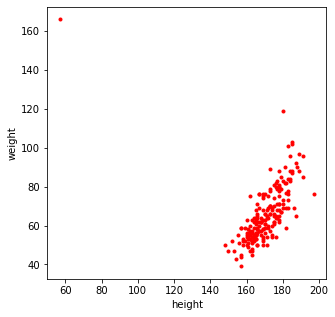

In [114]:
plt.figure(figsize=(5,5))
plt.plot(davis['height'].to_numpy(),davis['weight'].to_numpy(),'.r')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

Карлик ростом 60 см и весом 160 кг не имеет права на жизнь, требуется устранить!

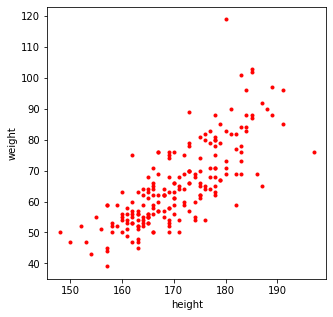

(199, 5)


In [115]:
davis = davis.loc[davis['weight']<120]
davis = davis.loc[davis['height']>120]
plt.figure(figsize=(5,5))
plt.plot(davis['height'].to_numpy(),davis['weight'].to_numpy(),'.r')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()
print(davis.shape)

- Данные с пропусками в атрибутах удалять не будем, так как поступил приказ свыше :)
- Аномалии(а может и нет) в виде сущностей рост 180,вес 120 и рост 200 вес 80 не трогаю, так как такое вроде как жить может, на собственном примере знаю.

#### 2) Выделите тестовую выборку из 50 экземпляров

In [116]:
train,test = train_test_split(davis,test_size=50)
test.shape

(50, 5)

#### 3) На тренировочных данных постройте:
- Гистограмму height
- Гистограмму weight
- Эти же гистограммы для разных полов

In [117]:
import seaborn as sns

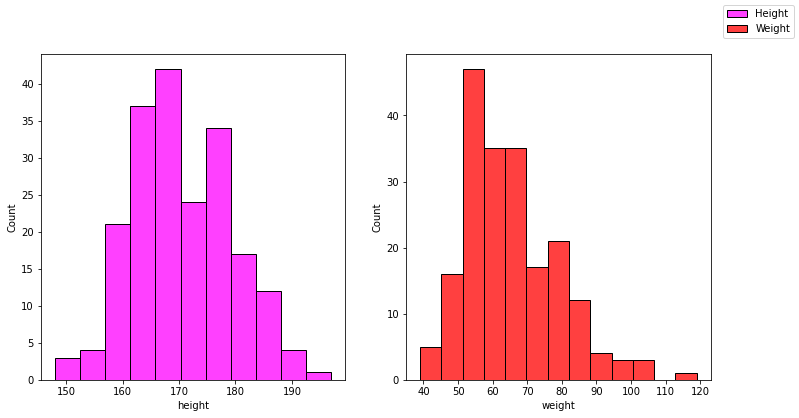

In [118]:
fig, axes = plt.subplots(1,2,figsize = (12,6))
sns.histplot(davis['height'], color='magenta',label='Height',ax = axes[0])
sns.histplot(davis['weight'], color='red',label='Weight',ax = axes[1])
fig.legend()
plt.show()

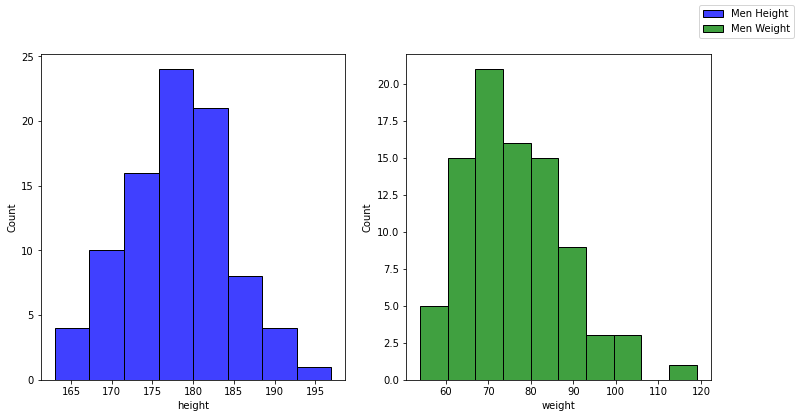

In [119]:
fig, axes = plt.subplots(1,2,figsize = (12,6))
sns.histplot(davis[davis['sex'] == 'M']['height'], color='blue', label='Men Height',ax = axes[0])
sns.histplot(davis[davis['sex'] == 'M']['weight'], color='green', label='Men Weight',ax = axes[1])
fig.legend()
plt.show()

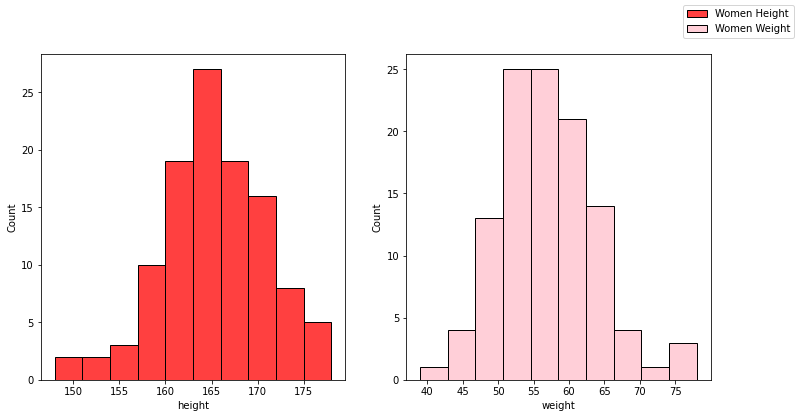

In [120]:
fig, axes = plt.subplots(1,2,figsize = (12,6))
sns.histplot(davis[davis['sex'] == 'F']['height'], color='red', label='Women Height',ax = axes[0])
sns.histplot(davis[davis['sex'] == 'F']['weight'], color='pink', label='Women Weight',ax = axes[1])
fig.legend()
plt.show()

#### 4) На тренировочных данных обучите классификатор пола (sex), используя только признаки height и weight. Замерьте производительность на тренировочной и тестовой выборке (через Accuracy). Рекомендуемые модели:  логистическая регрессия, quadratic discriminant analysis.

In [121]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
train.replace({'M':1,'F':0},inplace = True)
test.replace({'M':1,'F':0},inplace = True)

In [122]:
qda = QuadraticDiscriminantAnalysis()
trainX = train[['height', 'weight']]
trainY = train['sex']
qda.fit(trainX,trainY)
print(qda.score(trainX,trainY))

0.8926174496644296


In [123]:
from sklearn.metrics import accuracy_score

In [124]:
testX = test[['weight','height']]
testY = test['sex']
predicts = qda.predict(testX)
print(accuracy_score(predicts,testY))

0.4


D:\Programs\anaconda\envs\Labs\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


#### 5) Отобразите точки из обучающей выборки на плоскости (height-weight). Покрасьте их цветами в зависимости от пола. Раскрасьте области в зависимости от пола, предсказанного обученным в п.4. классификатором. 

In [125]:
from matplotlib.colors import ListedColormap
class_cmap = ListedColormap(['blue', 'red'])

D:\Programs\anaconda\envs\Labs\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
D:\Programs\anaconda\envs\Labs\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


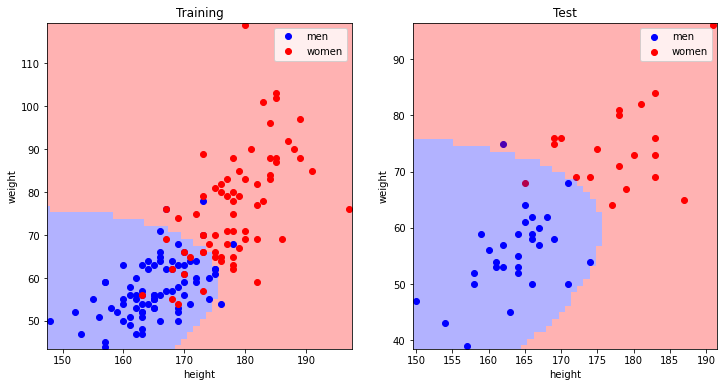

In [128]:
fig, axes = plt.subplots(1,2,figsize = (12,6))

x_min, x_max = trainX['height'].min()-0.5, trainX['height'].max()+0.5
y_min, y_max = trainX['weight'].min()-0.5, trainX['weight'].max()+0.5
xx, yy = np.mgrid[x_min:x_max:50j, y_min:y_max:50j]
predX = np.column_stack([xx.reshape(-1), yy.reshape(-1)])
predY = qda.predict(predX)

axes[0].plot(train[trainY == 0]['height'],trainX[trainY == 0]['weight'], 'bo', label = 'men')
axes[0].plot(trainX[trainY == 1]['height'],trainX[trainY == 1]['weight'], 'ro', label = 'women')
axes[0].pcolormesh(xx, yy, predY.reshape(xx.shape), cmap=class_cmap, alpha=0.3, shading='auto')
axes[0].set_ylim(y_min, y_max)
axes[0].set_xlim(x_min, x_max)
axes[0].set_ylabel('weight')
axes[0].set_xlabel('height')
axes[0].set_title('Training')
axes[0].legend()


x_min, x_max = testX['height'].min()-0.5, testX['height'].max()+0.5
y_min, y_max = testX['weight'].min()-0.5, testX['weight'].max()+0.5
xx, yy = np.mgrid[x_min:x_max:50j, y_min:y_max:50j]
predX = np.column_stack([xx.reshape(-1), yy.reshape(-1)])
predY = qda.predict(predX)

axes[1].scatter(testX[testY == 0]['height'],testX[testY == 0]['weight'], color = 'blue', label = 'men')
axes[1].scatter(testX[testY == 1]['height'],testX[testY == 1]['weight'], color = 'red', label = 'women')
axes[1].pcolormesh(xx, yy, predY.reshape(xx.shape), cmap=class_cmap, alpha=0.3, shading='auto')
axes[1].set_ylim(y_min, y_max)
axes[1].set_xlim(x_min, x_max)
axes[1].set_ylabel('weight')
axes[1].set_xlabel('height')
axes[1].set_title('Test')
axes[1].legend()

plt.show()

## Задание 2. Для датасета CCPP.
#### 1) Возьмите данные с листа 1 и выделите валидационную и тестовую выборку.

In [130]:
ccpp = pd.read_excel('Folds5x2_pp.xlsx', sheet_name = 'Sheet1')
ccpp

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [131]:
train_val, test = train_test_split(ccpp, test_size = 0.2)
train, val = train_test_split(train_val, test_size= 0.2)
print(train.shape,val.shape,test.shape)

(6123, 5) (1531, 5) (1914, 5)


#### 2) Постройте регрессионную модель.  Замерьте коэффициент  и среднюю ошибку предсказания на валидационной выборке.


In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [141]:
linReg = LinearRegression()

trainX = train.drop('PE',axis = 1)
trainY = train["PE"]
valX = val.drop('PE',axis = 1)
valY = val["PE"]
testX = test.drop('PE',axis = 1)
testY = test["PE"]

In [143]:
linReg.fit(trainX,trainY)
predVal = linReg.predict(valX)
print('r2 score = ',r2_score(valY,predVal))

print('mae = ', mean_absolute_error(predVal,valY))

r2 score =  0.9308580030156821
mae =  3.5870660390385303


#### 3) Постройте точки из валидационной выборки на плоскости ($t$ =истинное значение, $y$ =предсказание модели). Отобразите вместе с ними прямую $y=t$. 


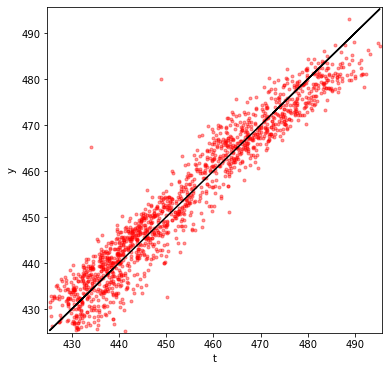

In [156]:
fig, ax = plt.subplots(1,1,figsize = (6,6))
ax.plot(valY, predVal,'r.', alpha=0.4)
ax.plot(valY, valY,'-k')
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_xlim(valY.min()-0.5,valY.max()+0.5)
ax.set_ylim(valY.min()-0.5,valY.max()+0.5)
plt.show()

#### 5*) Замерьте $R^2$  и повторите п. 3. на тестовой выборке.


In [151]:
predTest = linReg.predict(testX)
print(r2_score(testY,predTest))

0.9295036889932538


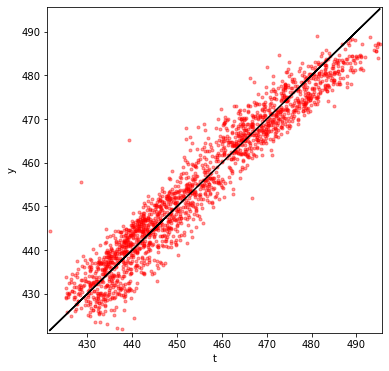

In [157]:
predTest = linReg.predict(testX)
fig, ax = plt.subplots(1,1,figsize = (6,6))
ax.plot(testY, predTest,'r.', alpha=0.4)
ax.plot(testY, testY,'-k')
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_xlim(testY.min()-0.5,testY.max()+0.5)
ax.set_ylim(testY.min()-0.5,testY.max()+0.5)
plt.show()